In [2]:
'''
This script produces plots to analyse data from the diffent locations and are discussed in section 3 of the paper.
The main goal is to create a plot to visualize the average power draw per location 

Two aspect have to be taken into account:
- Using the correct time zone
- Turning the time-variables into minutes instead of timestamps
'''

'\nThis script produces plots to analyse data from the diffent locations and are discussed in section 3 of the paper.\nThe main goal is to create a plot to visualize the average power draw per location \n\nTwo aspect have to be taken into account:\n- Using the correct time zone\n- Turning the time-variables into minutes instead of timestamps\n'

In [3]:
import pandas as pd
import numpy as np
import pytz
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
# Load Caltech CSV 
df = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/8/requestedDeparture,userInputs/8/userID,userInputs/9/WhPerMile,userInputs/9/kWhRequested,userInputs/9/milesRequested,userInputs/9/minutesAvailable,userInputs/9/modifiedAt,userInputs/9/paymentRequired,userInputs/9/requestedDeparture,userInputs/9/userID
0,5dd1f434f9af8b2dec17805f,39,"Fri, 01 Nov 2019 14:11:14 GMT","Fri, 01 Nov 2019 15:27:06 GMT","Fri, 01 Nov 2019 15:27:01 GMT",4.279,2_39_89_25_2019-11-01 14:11:13.813067,2,CA-315,2-39-89-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5dd1f434f9af8b2dec178060,39,"Fri, 01 Nov 2019 14:43:05 GMT","Fri, 01 Nov 2019 23:36:35 GMT","Fri, 01 Nov 2019 18:24:36 GMT",11.769,2_39_90_26_2019-11-01 14:43:04.819121,2,CA-316,2-39-90-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5dd1f434f9af8b2dec178061,39,"Fri, 01 Nov 2019 14:52:02 GMT","Fri, 01 Nov 2019 20:54:46 GMT","Fri, 01 Nov 2019 19:52:10 GMT",0.889,2_39_139_28_2019-11-01 14:52:02.094336,2,CA-303,2-39-139-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dd1f434f9af8b2dec178062,39,"Fri, 01 Nov 2019 15:24:52 GMT","Fri, 01 Nov 2019 19:19:15 GMT","Fri, 01 Nov 2019 19:19:10 GMT",13.430,2_39_78_366_2019-11-01 15:24:51.692724,2,CA-323,2-39-78-366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5dd1f434f9af8b2dec178063,39,"Fri, 01 Nov 2019 15:59:05 GMT","Fri, 01 Nov 2019 23:07:37 GMT","Fri, 01 Nov 2019 19:39:17 GMT",12.001,2_39_79_383_2019-11-01 15:59:04.798455,2,CA-492,2-39-79-383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Load your CSV
df = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Parse timestamps as UTC (since GMT is equivalent to UTC)
df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')

# Convert from UTC (GMT) to Pacific Time, handling daylight savings
df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

# Create a vector for total minutes in a day (PST time)
minutes_in_day = 24 * 60
energy_per_minute = np.zeros(minutes_in_day)
count_per_minute = np.zeros(minutes_in_day)
#energysessionlist

# Process each session
for _, row in df.iterrows():
    start = row['connectionTime']
    end = row['disconnectTime']
    energy = row['kWhDelivered']
    
    if end <= start:
        continue  # Skip invalid sessions

    # Spread energy evenly over session duration
    duration_minutes = int((end - start).total_seconds() / 60)
    if duration_minutes == 0:
        continue

    energy_per_session_minute = energy / duration_minutes

    for i in range(duration_minutes):
        minute_time = start + timedelta(minutes=i)
        minute_of_day = minute_time.hour * 60 + minute_time.minute
        energy_per_minute[minute_of_day] += energy_per_session_minute
        count_per_minute[minute_of_day] += 1

# Calculate average power draw in kW
average_power_kw = energy_per_minute  # Already in kWh per minute

# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]


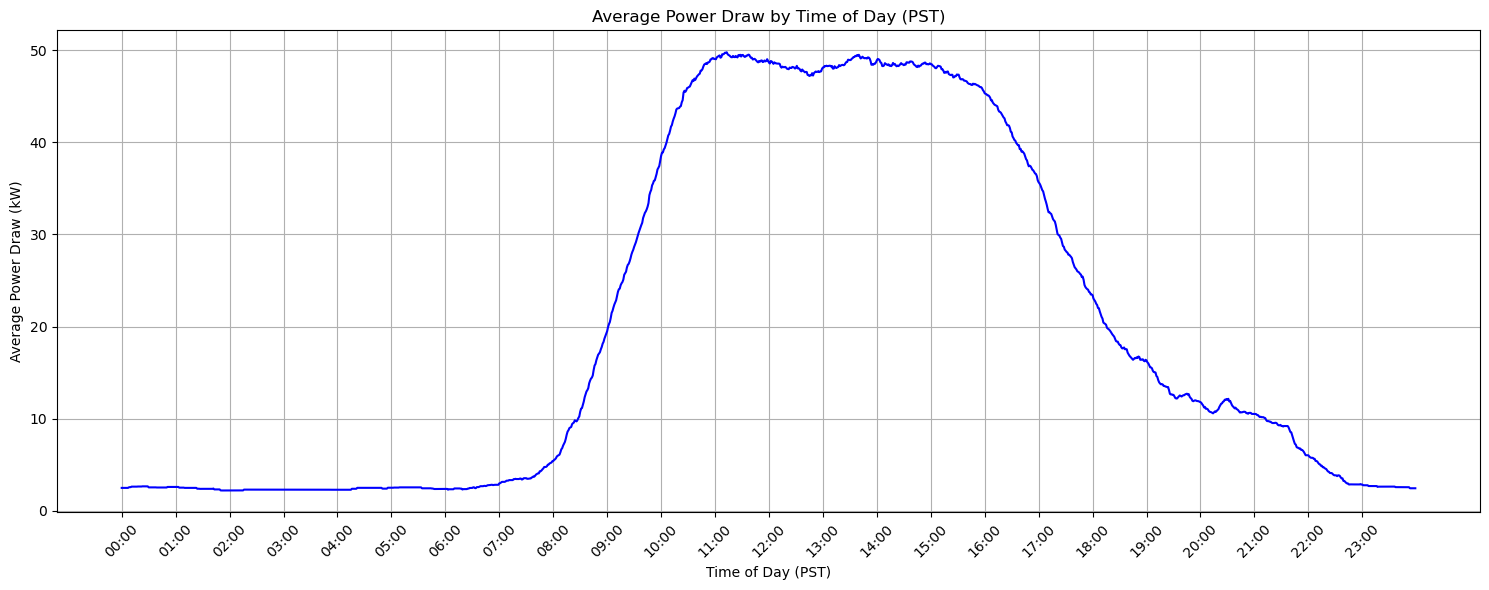

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(average_power_kw, color='blue', linewidth=1.5)
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Function to process each CSV file
def process_csv(file_path):
    # Load CSV
    df = pd.read_csv(file_path)

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
    df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered','doneChargingTime'])

    # Create vectors for energy and count per minute
    minutes_in_day = 24 * 60
    energy_per_minute = np.zeros(minutes_in_day)
    count_per_minute = np.zeros(minutes_in_day)
    energysessionlist = []

    # Process each session
    for _, row in df.iterrows():
        start = row['connectionTime']
        end = row['doneChargingTime']
        energy = row['kWhDelivered']
        
        if end <= start:
            continue  # Skip invalid sessions

        # Spread energy evenly over session duration
        duration_minutes = int((end - start).total_seconds() / 60)
        if duration_minutes == 0:
            continue

        energy_per_session_minute = energy / duration_minutes
        energysessionlist.append(energy_per_session_minute)
        for i in range(duration_minutes):
            minute_time = start + timedelta(minutes=i)
            minute_of_day = minute_time.hour * 60 + minute_time.minute
            energy_per_minute[minute_of_day] += energy_per_session_minute
            count_per_minute[minute_of_day] += 1

    return energy_per_minute


In [8]:
# Process the three CSV files
energy_file1 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")
energy_file2 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")  
energy_file3 = process_csv("Data/acndata_sessions 2019_11 till 2020_5 office1.csv") 

C:\Users\chris\AppData\Local\Temp\ipykernel_24672\2559978751.py:8: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


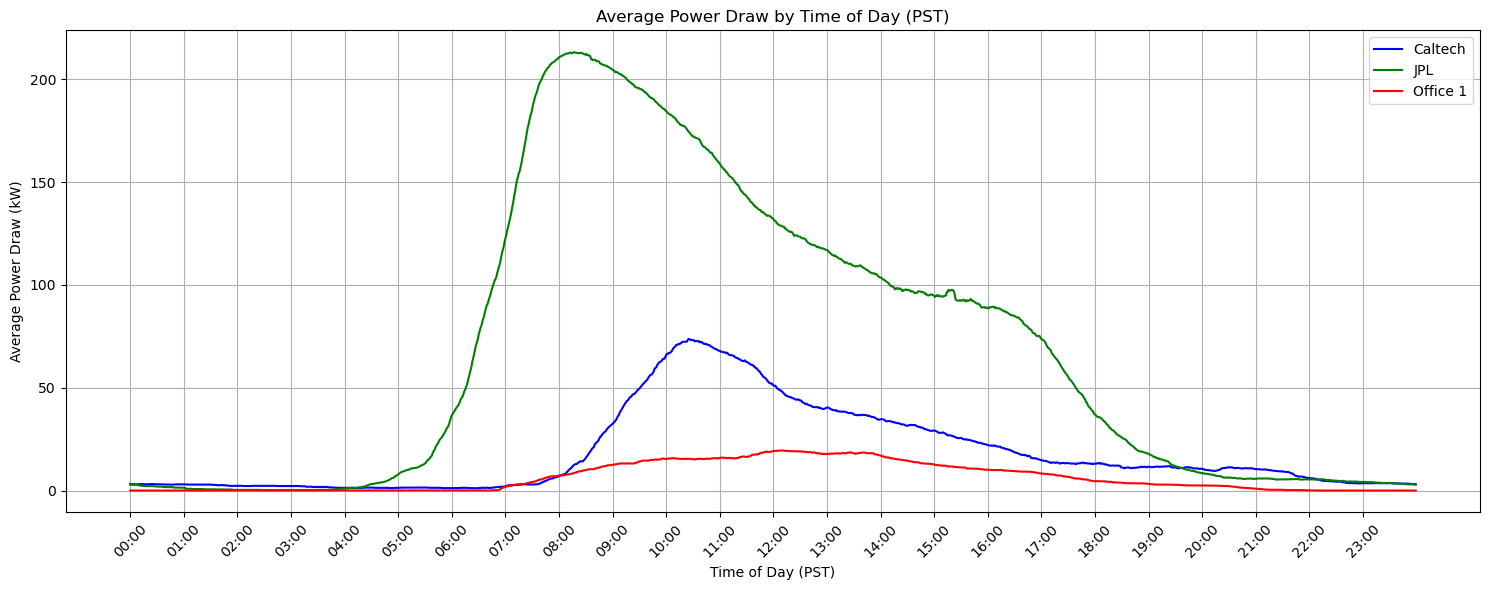

In [9]:
# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(energy_file1, color='blue', label='Caltech', linewidth=1.5)
plt.plot(energy_file2, color='green', label='JPL', linewidth=1.5)
plt.plot(energy_file3, color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
file_path = "Data/acndata_sessions 2019_11 till 2020_5 office1.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Convert time columns to datetime format
df["connectionTime"] = pd.to_datetime(df["connectionTime"], errors="coerce", utc=True)
df["doneChargingTime"] = pd.to_datetime(df["doneChargingTime"], errors="coerce", utc=True)

# Compute charging duration in hours
df["charging_duration_hrs"] = (df["doneChargingTime"] - df["connectionTime"]).dt.total_seconds() / 3600

# Compute power draw (kW)
df["power_draw_kW"] = df["kWhDelivered"] / df["charging_duration_hrs"]

# Filter out invalid values (e.g., division by zero or NaN durations)
df_valid = df[df["charging_duration_hrs"] > 0]
# Sort by connection time
df_valid = df_valid.sort_values(by="connectionTime")

# Create a list of active sessions with their end times and power draws
active_sessions = []
max_total_power = 0

# Iterate through each session
for _, row in df_valid.iterrows():
    start_time = row["connectionTime"]
    end_time = row["doneChargingTime"]
    power_draw = row["power_draw_kW"]
    
    # Remove sessions that have already ended before this one starts
    active_sessions = [(e, p) for e, p in active_sessions if e > start_time]
    
    # Add the new session
    active_sessions.append((end_time, power_draw))
    
    # Calculate total simultaneous power draw
    total_power_draw = sum(p for _, p in active_sessions)
    
    # Update max total power draw
    max_total_power = max(max_total_power, total_power_draw)

max_total_power

34.91702377572868

In [11]:
file_path = 'Data/acndata_sessions 2019_11 till 2020_5 caltech.csv'
df = pd.read_csv(file_path)

df['date_only'] = df['connectionTime'].str.split(' ', n=3).str[1] + ' ' + df['connectionTime'].str.split(' ', n=3).str[2] + ' ' + df['connectionTime'].str.split(' ', n=3).str[3].str.split(' ', n=1).str[0]

# Define time zones
gmt_tz = pytz.timezone("GMT")
pst_tz = pytz.timezone("US/Pacific")

# Parse timestamps as UTC (since GMT is equivalent to UTC)
df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

# Convert from UTC (GMT) to Pacific Time, handling daylight savings
df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

df['connectionTime'] = pd.to_datetime(df['connectionTime'])
df['connectionTime'] = df['connectionTime'].dt.hour + df['connectionTime'].dt.minute / 60 + df['connectionTime'].dt.second / 3600

df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
df['disconnectTime'] = df['disconnectTime'].dt.hour + df['disconnectTime'].dt.minute / 60 + df['disconnectTime'].dt.second / 3600

df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])
df['doneChargingTime'] = df['doneChargingTime'].dt.hour + df['doneChargingTime'].dt.minute / 60 + df['doneChargingTime'].dt.second / 3600

# Drop rows with missing timestamps or kWhDelivered
df = df.dropna(subset=['connectionTime', 'disconnectTime','doneChargingTime','kWhDelivered'])
df['load'] = (df['disconnectTime'] - df['connectionTime']) / df['kWhDelivered']



df['connectionTime'] = df['connectionTime']*60
df['disconnectTime'] = df['disconnectTime']*60
df['doneChargingTime'] = df['doneChargingTime']*60

df['connectionTime'] = df['connectionTime'].astype(int)
df['disconnectTime'] = df['disconnectTime'].astype(int)
df['doneChargingTime'] = df['doneChargingTime'].astype(int)

df = df.reset_index(drop=True)

my_dict = {}
keys = list(set(df['date_only'].to_list()))
for i in range(len(keys)):
    my_dict[keys[i]] = [0] * 1440

maxlist = [0] * 1440

for i in range(0, len(df)):
    key = df.loc[i,'date_only']
    for j in range(df.loc[i,'connectionTime'], df.loc[i, 'disconnectTime']):
        my_dict[key][j] += df.loc[i,'load']

for i in range(0, 1440):
    for j in keys:
        value = my_dict[j][i]
        if value > maxlist[i]:
            maxlist[i] = value

averagelist = []
for i in range(0, 1440):
    listx = []
    for j in keys:
        listx.append(my_dict[j][i])
    filtered_listx = [x for x in listx if x != 0]
    averagelist.append(sum(listx) / len(listx))

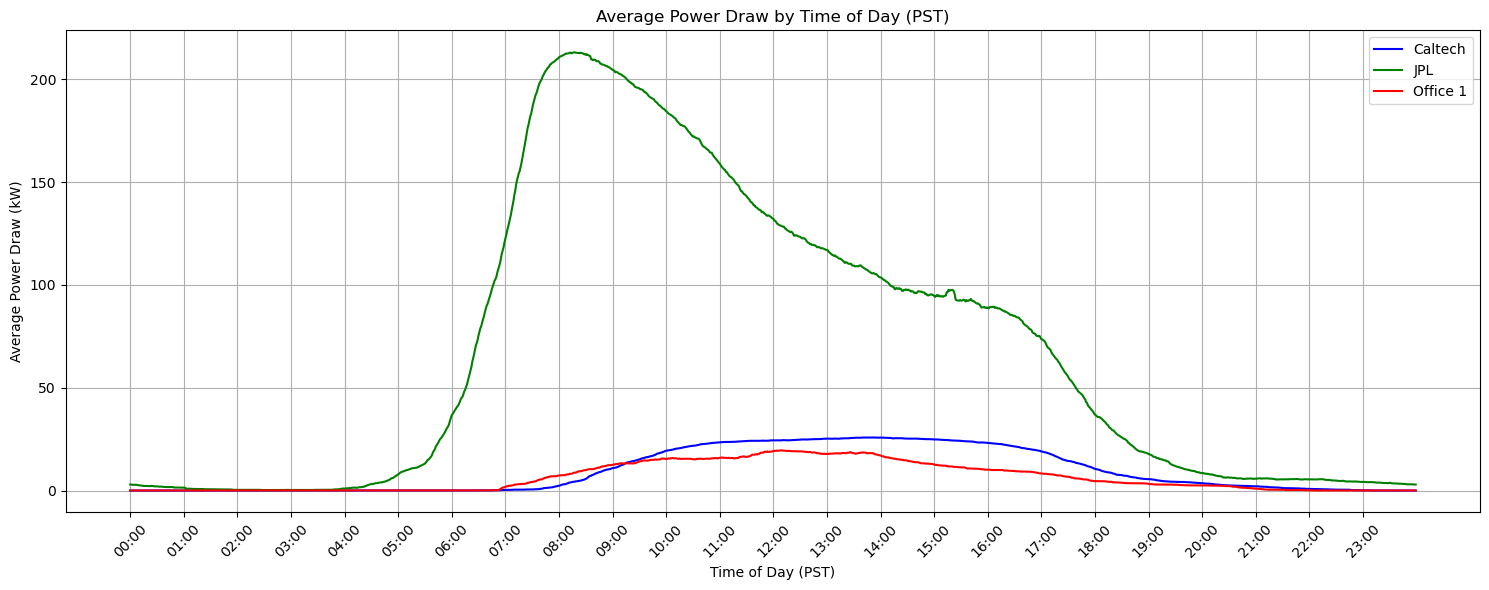

In [18]:
# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(range(0,1440),averagelist, color='blue', label='Caltech', linewidth=1.5)
plt.plot(energy_file2, color='green', label='JPL', linewidth=1.5)
plt.plot(energy_file3, color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

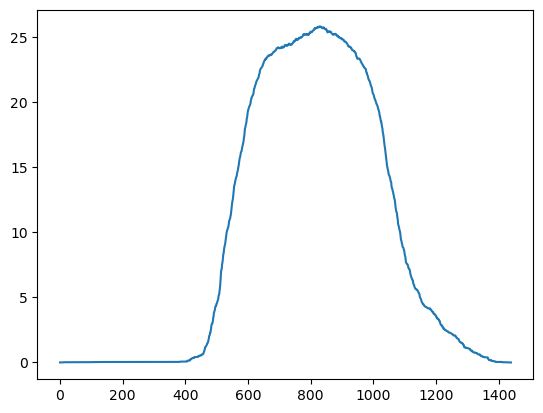

In [13]:
plt.plot(range(0,1440),averagelist)

In [14]:
def plotter(file_path):
    df = pd.read_csv(file_path)

    df['date_only'] = df['connectionTime'].str.split(' ', n=3).str[1] + ' ' + df['connectionTime'].str.split(' ', n=3).str[2] + ' ' + df['connectionTime'].str.split(' ', n=3).str[3].str.split(' ', n=1).str[0]

    # Define time zones
    gmt_tz = pytz.timezone("GMT")
    pst_tz = pytz.timezone("US/Pacific")

    # Parse timestamps as UTC (since GMT is equivalent to UTC)
    df['connectionTime'] = pd.to_datetime(df['connectionTime'], utc=True, errors='coerce')
    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], utc=True, errors='coerce')
    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], utc=True, errors='coerce')

    # Convert from UTC (GMT) to Pacific Time, handling daylight savings
    df['connectionTime'] = df['connectionTime'].dt.tz_convert(pst_tz)
    df['disconnectTime'] = df['disconnectTime'].dt.tz_convert(pst_tz)
    df['doneChargingTime'] = df['doneChargingTime'].dt.tz_convert(pst_tz)

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime', 'kWhDelivered'])

    df['connectionTime'] = pd.to_datetime(df['connectionTime'])
    df['connectionTime'] = df['connectionTime'].dt.hour + df['connectionTime'].dt.minute / 60 + df['connectionTime'].dt.second / 3600

    df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
    df['disconnectTime'] = df['disconnectTime'].dt.hour + df['disconnectTime'].dt.minute / 60 + df['disconnectTime'].dt.second / 3600

    df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])
    df['doneChargingTime'] = df['doneChargingTime'].dt.hour + df['doneChargingTime'].dt.minute / 60 + df['doneChargingTime'].dt.second / 3600

    # Drop rows with missing timestamps or kWhDelivered
    df = df.dropna(subset=['connectionTime', 'disconnectTime','doneChargingTime','kWhDelivered'])
    df['load'] = (df['doneChargingTime'] - df['connectionTime']) / df['kWhDelivered']

    df['connectionTime'] = df['connectionTime']*60
    df['disconnectTime'] = df['disconnectTime']*60
    df['doneChargingTime'] = df['doneChargingTime']*60

    df['connectionTime'] = df['connectionTime'].astype(int)
    df['disconnectTime'] = df['disconnectTime'].astype(int)
    df['doneChargingTime'] = df['doneChargingTime'].astype(int)

    df = df.reset_index(drop=True)

    my_dict = {}
    keys = list(set(df['date_only'].to_list()))
    for i in range(len(keys)):
        my_dict[keys[i]] = [0] * 1440

    maxlist = [0] * 1440

    for i in range(0, len(df)):
        key = df.loc[i,'date_only']
        for j in range(df.loc[i,'connectionTime'], df.loc[i, 'doneChargingTime']):
            my_dict[key][j] += df.loc[i,'load']

    for i in range(0, 1440):
        for j in keys:
            value = my_dict[j][i]
            if value > maxlist[i]:
                maxlist[i] = value

    averagelist = []
    for i in range(0, 1440):
        listx = []
        for j in keys:
            listx.append(my_dict[j][i])
        filtered_listx = [x for x in listx if x != 0]
        if len(filtered_listx) == 0:
            averagelist.append(0)
        else:
            averagelist.append(sum(filtered_listx) / len(filtered_listx))
        #print(listx)
        #print(filtered_listx)
    return averagelist, maxlist

average, max = plotter('Data/acndata_sessions 2019_11 till 2020_5 caltech.csv')

C:\Users\chris\AppData\Local\Temp\ipykernel_24672\600243219.py:2: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


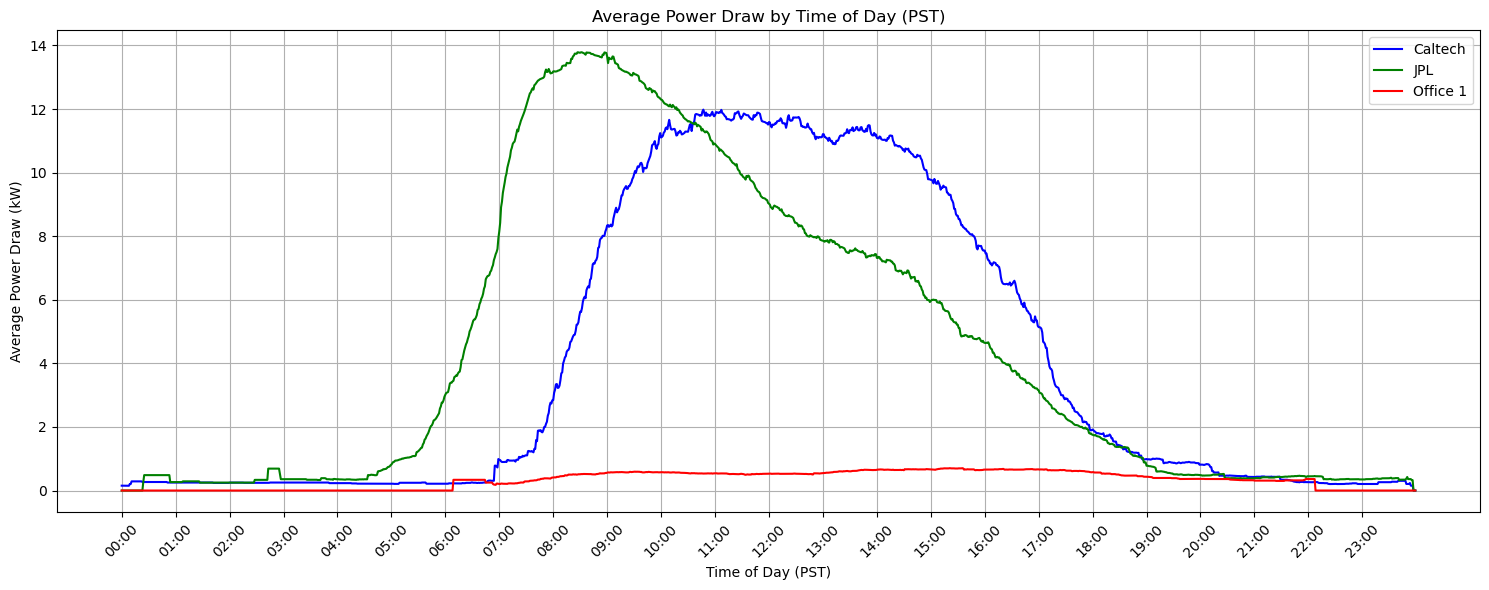

In [15]:
# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 caltech.csv')[0], color='blue', label='Caltech', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 jpl.csv')[0], color='green', label='JPL', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 office1.csv')[0], color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Average Power Draw (kW)")
plt.title("Average Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_24672\600243219.py:2: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


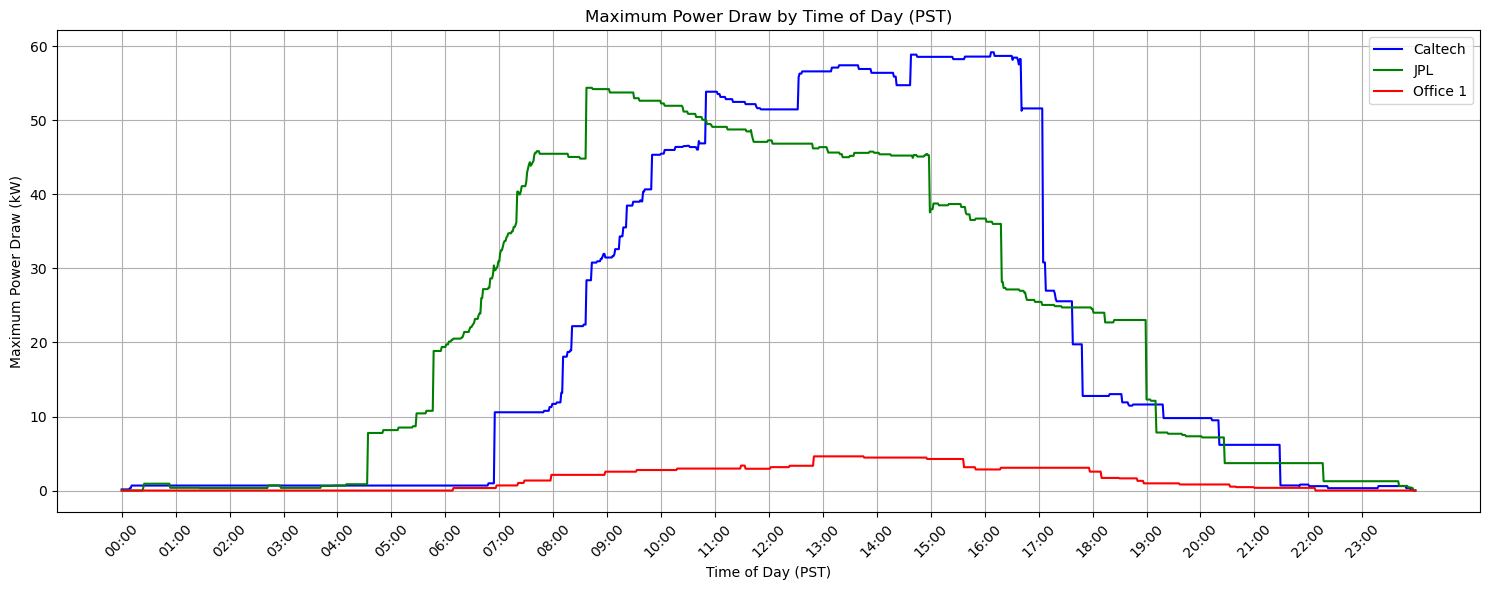

In [16]:
# Generate time labels for x-axis (every hour)
time_labels = [f"{h:02d}:00" for h in range(24)]
time_ticks = [h * 60 for h in range(24)]

# Plot the three energy curves on the same plot
plt.figure(figsize=(15, 6))
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 caltech.csv')[1], color='blue', label='Caltech', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 jpl.csv')[1], color='green', label='JPL', linewidth=1.5)
plt.plot(range(0,1440),plotter('Data/acndata_sessions 2019_11 till 2020_5 office1.csv')[1], color='red', label='Office 1', linewidth=1.5)

# Customize the plot
plt.xticks(time_ticks, time_labels, rotation=45)
plt.xlabel("Time of Day (PST)")
plt.ylabel("Maximum Power Draw (kW)")
plt.title("Maximum Power Draw by Time of Day (PST)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

[3.13101562 3.13101562 3.13101562 ... 3.11044948 3.11044948 3.11044948]
<class 'numpy.ndarray'>
[np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15287818247607612), np.float64(0.15047892972431645), np.float64(0.2047478454031623), np.float64(0.2047478454031623), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.288032952977117), np.float64(0.26826097244347274), np.float64(0.26826097244347274), np.float64(0.26826097244347274), np.float64(0.26826097244347274), np.float64(0.26826097244347274), np.fl

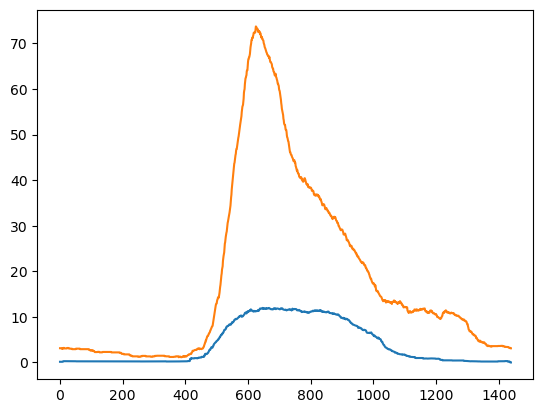

In [17]:
print(energy_file1)
print(type(energy_file1))
print(average)

plt.plot(range(0,1440),average)
plt.plot(range(0,1440), energy_file1)